# Data Analytics

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import sklearn
import nltk

import json
import ssl

from collections import Counter
from itertools import chain 
from nltk.tokenize import word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/wu_ziang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
tmdb = pd.read_csv('data/tmdb_5000_features.csv')
tmdb.head()

,id,title,language,overview,popularity,release_date,runtime,vote_average,vote_count,cast_num,...,genre_1,genre_2,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,company_0,company_1,country
0,19995,Avatar,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,7.2,11800,83,...,Adventure,Fantasy,culture clash,future,space war,space colony,society,Ingenious Film Partners,Twentieth Century Fox Film Corporation,US
1,285,Pirates of the Caribbean: At World's End,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,6.9,4500,34,...,Fantasy,Action,ocean,drug abuse,exotic island,east india trading company,love of one's life,Walt Disney Pictures,Jerry Bruckheimer Films,US
2,206647,Spectre,en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,148.0,6.3,4466,83,...,Adventure,Crime,spy,based on novel,secret agent,sequel,mi6,Columbia Pictures,Danjaq,GB
3,49026,The Dark Knight Rises,en,Following the death of District Attorney Harve...,112.312950,2012-07-16,165.0,7.6,9106,158,...,Crime,Drama,dc comics,crime fighter,terrorist,secret identity,burglar,Legendary Pictures,Warner Bros.,US
4,49529,John Carter,en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,132.0,6.1,2124,27,...,Adventure,Science Fiction,based on novel,mars,medallion,space travel,princess,Walt Disney Pictures,NaN,US


In [3]:
tmdb.columns

Index(['id', 'title', 'language', 'overview', 'popularity', 'release_date',
       'runtime', 'vote_average', 'vote_count', 'cast_num', 'cast_0',
       'cast_0_gender', 'cast_1', 'cast_1_gender', 'cast_2', 'cast_2_gender',
       'crew_num', 'director', 'genre_0', 'genre_1', 'genre_2', 'keyword_0',
       'keyword_1', 'keyword_2', 'keyword_3', 'keyword_4', 'company_0',
       'company_1', 'country'],
      dtype='object')

## 1 Data Exploration

In [4]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

In [5]:
tmdb_numerical = tmdb[['popularity', 'release_date', 'runtime', 'vote_average', 'vote_count', 'cast_num', 'crew_num']]

In [6]:
tmdb_numerical.corr()

,popularity,runtime,vote_average,vote_count,cast_num,crew_num
popularity,1.000000,0.224723,0.275023,0.777924,0.358600,0.446948
runtime,0.224723,1.000000,0.376691,0.271726,0.310134,0.218604
vote_average,0.275023,0.376691,1.000000,0.314757,0.230024,0.170541
vote_count,0.777924,0.271726,0.314757,1.000000,0.442630,0.474874
cast_num,0.358600,0.310134,0.230024,0.442630,1.000000,0.351287
crew_num,0.446948,0.218604,0.170541,0.474874,0.351287,1.000000


In [7]:
tmdb_numerical.corr().style.background_gradient(cmap='coolwarm')

,popularity,runtime,vote_average,vote_count,cast_num,crew_num
popularity,1,0.224723,0.275023,0.777924,0.3586,0.446948
runtime,0.224723,1,0.376691,0.271726,0.310134,0.218604
vote_average,0.275023,0.376691,1,0.314757,0.230024,0.170541
vote_count,0.777924,0.271726,0.314757,1,0.44263,0.474874
cast_num,0.3586,0.310134,0.230024,0.44263,1,0.351287
crew_num,0.446948,0.218604,0.170541,0.474874,0.351287,1


### 1.1 Vote Count

In [4]:
tmdb['vote_count'].describe()

count     4790.000000
mean       692.068058
std       1235.748570
min          0.000000
25%         55.000000
50%        237.000000
75%        739.500000
max      13752.000000
Name: vote_count, dtype: float64

The number of votes of movies range from 0 to 13,752 with mean of 692 and median of 237.

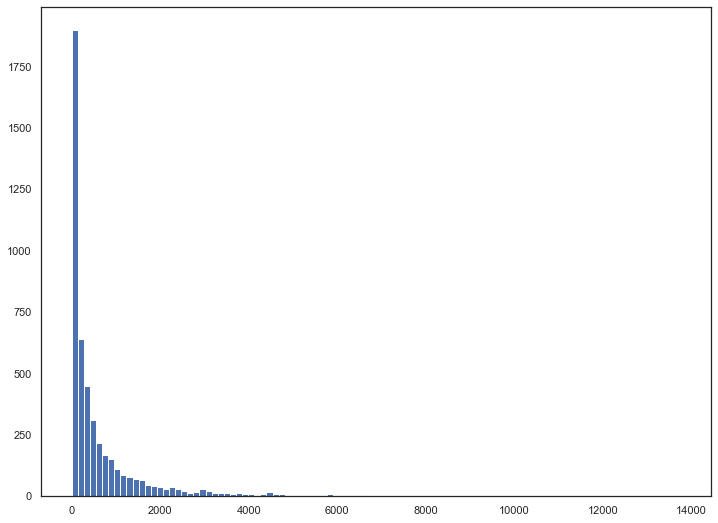

In [5]:
plt.figure(figsize=(12,9))
plt.hist(tmdb['vote_count'], bins=100)
plt.show()

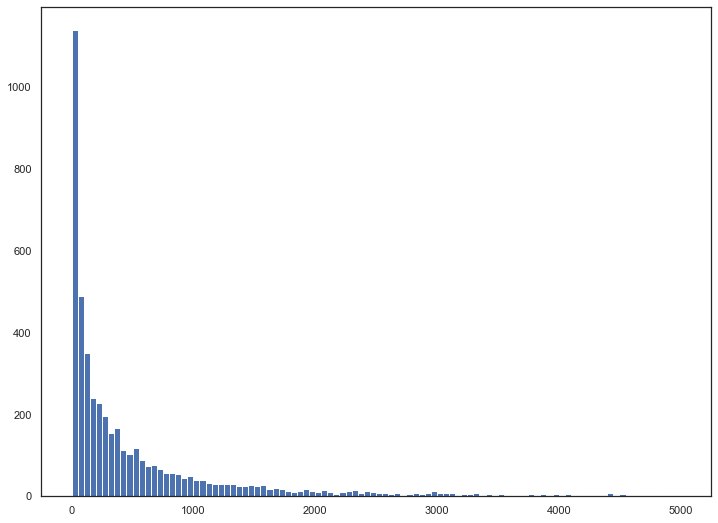

In [6]:
plt.figure(figsize=(12,9))
plt.hist(tmdb[tmdb['vote_count']<5000]['vote_count'], bins=100)
plt.show()

In [7]:
tmdb_top_vote_count = tmdb.sort_values(by=['vote_count'], ascending=False).copy()

In [8]:
tmdb_top_vote_count[['title', 'language', 'popularity', 'runtime', 'vote_average', 'vote_count']].head(20)

,title,language,popularity,runtime,vote_average,vote_count
96,Inception,en,167.583710,148.0,8.1,13752
65,The Dark Knight,en,187.322927,152.0,8.2,12002
0,Avatar,en,150.437577,162.0,7.2,11800
16,The Avengers,en,144.448633,143.0,7.4,11776
788,Deadpool,en,514.569956,108.0,7.4,10995
95,Interstellar,en,724.247784,169.0,8.1,10867
287,Django Unchained,en,82.121691,165.0,7.8,10099
94,Guardians of the Galaxy,en,481.098624,121.0,7.9,9742
426,The Hunger Games,en,68.550698,142.0,6.9,9455
127,Mad Max: Fury Road,en,434.278564,120.0,7.2,9427


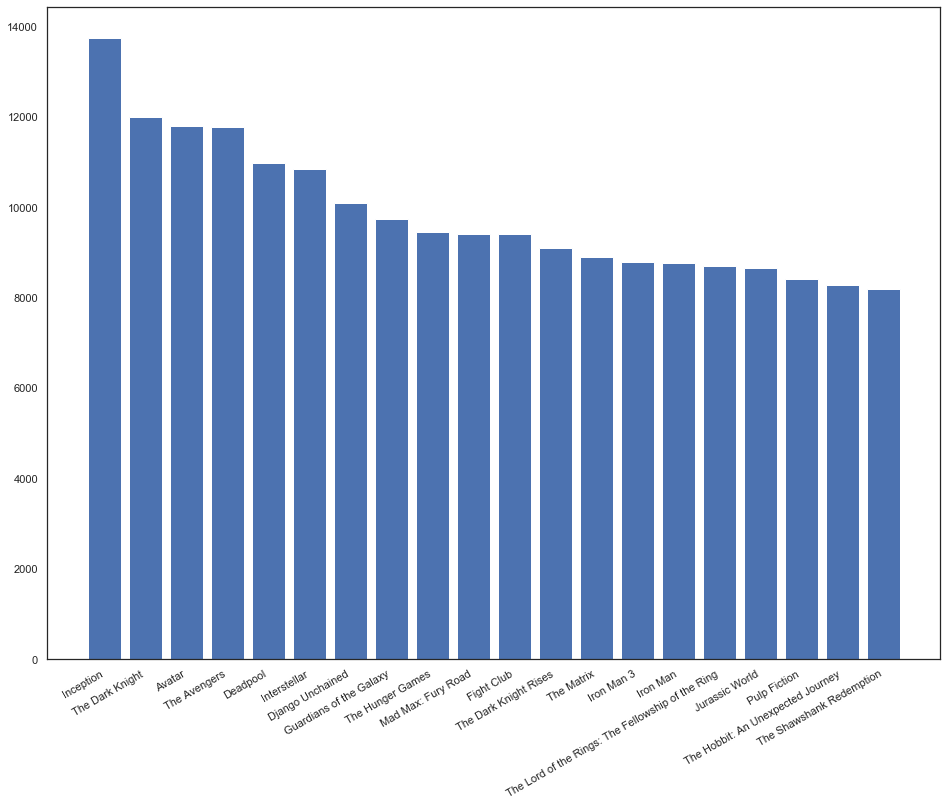

In [9]:
plt.figure(figsize=(16,12))
plt.bar(np.arange(20), tmdb_top_vote_count['vote_count'].head(20))
plt.xticks(np.arange(20), tmdb_top_vote_count['title'].head(20), rotation=30, ha='right')
plt.show()

In [10]:
tmdb_top_vote_count['vote_average'].describe()

count    4790.000000
mean        6.095574
std         1.184000
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

The top voted moives generally have pretty good vote average as well.

In [11]:
tmdb_top_vote_count[['vote_average', 'vote_count']].corr()

,vote_average,vote_count
vote_average,1.000000,0.314757
vote_count,0.314757,1.000000


However, no significant correlation observed between the vote count and vote average

## 1.2 Vote Average

In [12]:
tmdb['vote_average'].describe()

count    4790.000000
mean        6.095574
std         1.184000
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

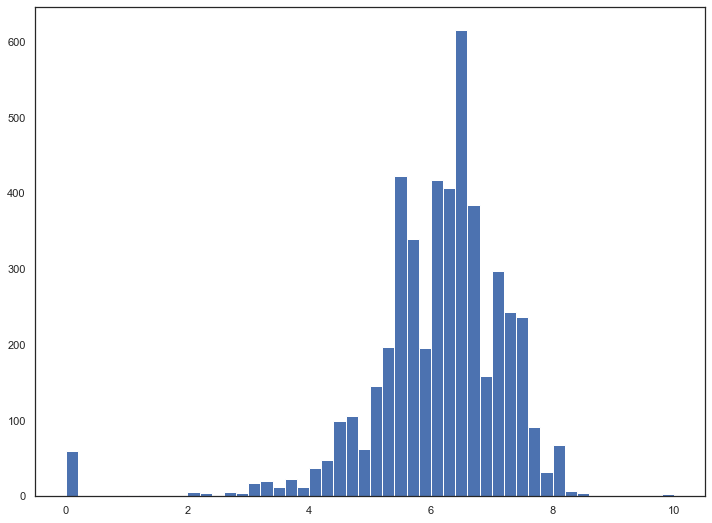

In [13]:
plt.figure(figsize=(12,9))
plt.hist(tmdb['vote_average'], bins=50)
plt.show()

In [14]:
tmdb['vote_average'].skew()

-1.9483366228050376

The vote average is left skewed and the skew is -1.96

In [15]:
np.sum((tmdb['vote_average']==0) & (tmdb['vote_average']==0))

60

There are 60 non-voted moives with vote average of 0.

In [16]:
tmdb[tmdb['vote_average']>8.5]['vote_count'].describe()

count    5.000000
mean     1.600000
std      0.547723
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      2.000000
Name: vote_count, dtype: float64

Note that very high vote averages are generally based on small numbers of votes per moive.

In [17]:
tmdb[tmdb['vote_average']<4.5]['vote_count'].describe()

count     284.000000
mean       78.387324
std       203.269646
min         0.000000
25%         1.000000
50%        11.500000
75%        55.500000
max      2278.000000
Name: vote_count, dtype: float64

Note that very low vote averages are generally based on small numbers of votes per moive.

In [18]:
extreme_vote_average = ((tmdb['vote_average']<4.5) | (tmdb['vote_average']>8.5))
np.sum(extreme_vote_average)

289

The movies with extreme vote average, i.e. below 4.5 or above 8.5 are filtered

In [19]:
tmdb[extreme_vote_average & (tmdb['vote_count']>=400)][['id', 'title', 'vote_average', 'vote_count']]

,id,title,vote_average,vote_count
210,415,Batman & Robin,4.2,1418
242,166424,Fantastic Four,4.4,2278
259,1639,Speed 2: Cruise Control,4.1,434
303,314,Catwoman,4.2,808
499,71880,Jack and Jill,4.1,604
610,188207,The Legend of Hercules,4.4,533
1035,20533,Jonah Hex,4.4,420
1652,14164,Dragonball Evolution,2.9,462
3051,87818,Movie 43,4.4,797
3744,241251,The Boy Next Door,4.1,1022


As shown, only 11 out of 289 movies with extreme vote average has more than 400 votes.

In [20]:
tmdb_top_vote_average = tmdb.sort_values(by=['vote_average'], ascending=False).copy()
tmdb_top_vote_average = tmdb_top_vote_average[tmdb_top_vote_average['vote_count']>=250]

In [21]:
tmdb_top_vote_average[['title', 'language', 'popularity', 'runtime', 'vote_average', 'vote_count']].head(20)

,title,language,popularity,runtime,vote_average,vote_count
1881,The Shawshank Redemption,en,136.747729,142.0,8.5,8205
3335,The Godfather,en,143.659698,175.0,8.4,5893
3230,Pulp Fiction,en,121.463076,154.0,8.3,8428
662,Fight Club,en,146.757391,139.0,8.3,9413
1818,Schindler's List,en,104.469351,195.0,8.3,4329
2294,Spirited Away,ja,118.968562,125.0,8.3,3840
3863,Whiplash,en,192.528841,105.0,8.3,4254
2730,The Godfather: Part II,en,105.792936,200.0,8.3,3338
690,The Green Mile,en,103.698022,189.0,8.2,4048
65,The Dark Knight,en,187.322927,152.0,8.2,12002


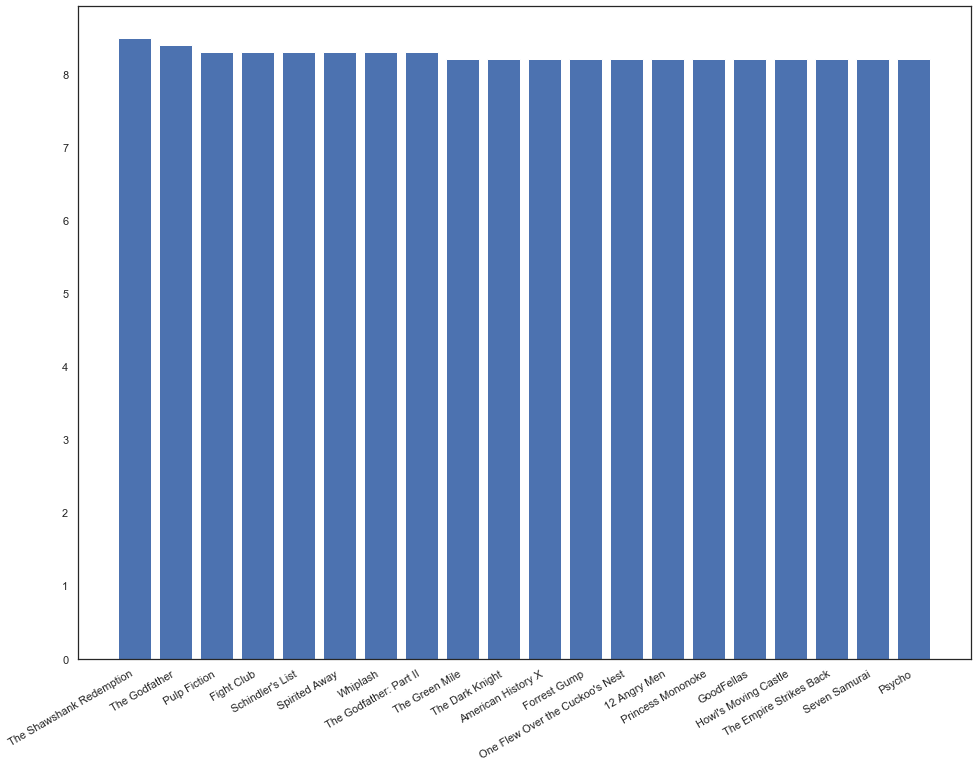

In [22]:
plt.figure(figsize=(16,12))
plt.bar(np.arange(20), tmdb_top_vote_average['vote_average'].head(20))
plt.xticks(np.arange(20), tmdb_top_vote_average['title'].head(20), rotation=30, ha='right')
plt.show()

## 1.3 Genres

In [23]:
tmdb_genres = tmdb[['id', 'title', 'genre_0', 'genre_1', 'genre_2']].copy()
tmdb_genres = tmdb_genres.set_index(['id', 'title']).stack().reset_index()[['id', 'title', 0]]
tmdb_genres = tmdb_genres.rename(columns={0:'genre'})

tmdb_genres.head(15)

,id,title,genre
0,19995,Avatar,Action
1,19995,Avatar,Adventure
2,19995,Avatar,Fantasy
3,285,Pirates of the Caribbean: At World's End,Adventure
4,285,Pirates of the Caribbean: At World's End,Fantasy
5,285,Pirates of the Caribbean: At World's End,Action
6,206647,Spectre,Action
7,206647,Spectre,Adventure
8,206647,Spectre,Crime
9,49026,The Dark Knight Rises,Action


In [24]:
tmdb_genres_count = tmdb_genres.groupby('genre').size().to_frame().reset_index()
tmdb_genres_count = tmdb_genres_count.rename(columns={0:'count'})
tmdb_genres_count = tmdb_genres_count.sort_values(by=['count'], ascending=False)

tmdb_genres_count

,genre,count
6,Drama,2249
3,Comedy,1665
0,Action,1127
17,Thriller,1003
14,Romance,774
1,Adventure,754
4,Crime,617
11,Horror,501
15,Science Fiction,412
7,Family,407


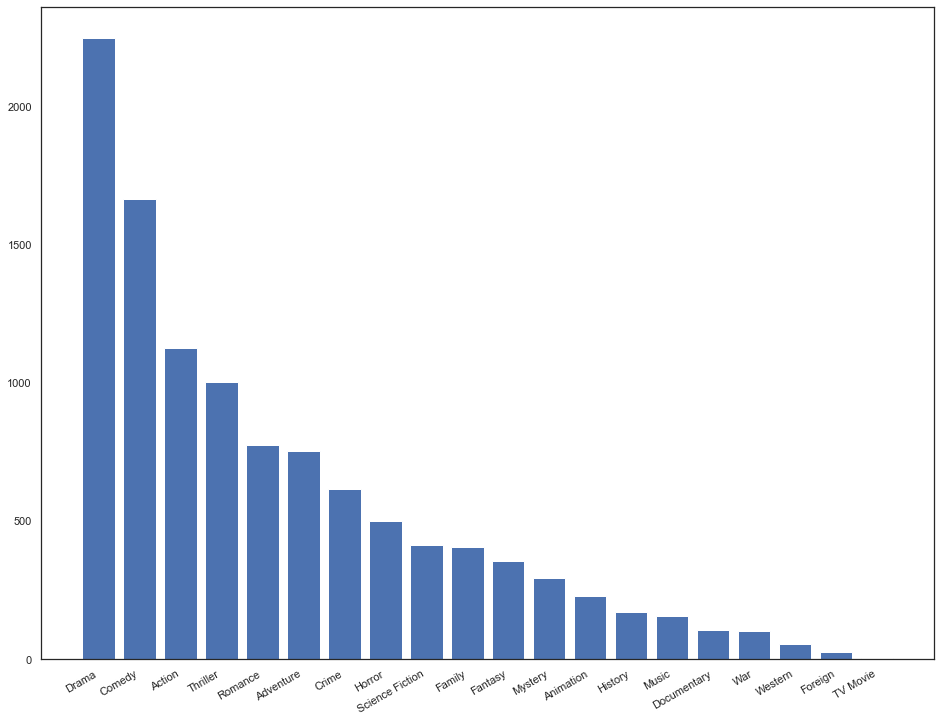

In [25]:
plt.figure(figsize=(16,12))
plt.bar(np.arange(len(tmdb_genres_count)), tmdb_genres_count['count'])
plt.xticks(np.arange(len(tmdb_genres_count)), tmdb_genres_count['genre'], rotation=30, ha='right')
plt.show()

## 1.4 Popular Actors and Directors

### 1.4.1 Top 20 Actors with Most Appearance

In [26]:
tmdb_casts = tmdb[['id', 'title', 'cast_0', 'cast_1', 'cast_2']].copy()
tmdb_casts = tmdb_casts.set_index(['id', 'title']).stack().reset_index()[['id', 'title', 0]]
tmdb_casts = tmdb_casts.rename(columns={0:'cast'})

tmdb_casts.head(15)

,id,title,cast
0,19995,Avatar,Sam Worthington
1,19995,Avatar,Zoe Saldana
2,19995,Avatar,Sigourney Weaver
3,285,Pirates of the Caribbean: At World's End,Johnny Depp
4,285,Pirates of the Caribbean: At World's End,Orlando Bloom
5,285,Pirates of the Caribbean: At World's End,Keira Knightley
6,206647,Spectre,Daniel Craig
7,206647,Spectre,Christoph Waltz
8,206647,Spectre,Léa Seydoux
9,49026,The Dark Knight Rises,Christian Bale


In [27]:
tmdb_casts_count = tmdb_casts.groupby('cast').size().to_frame().reset_index()
tmdb_casts_count = tmdb_casts_count.rename(columns={0:'count'})
tmdb_casts_count = tmdb_casts_count.sort_values(by=['count'], ascending=False)

tmdb_casts_count.head(20)

,cast,count
4578,Robert De Niro,46
689,Bruce Willis,35
4779,Samuel L. Jackson,35
3631,Matt Damon,35
4065,Nicolas Cage,34
2684,Johnny Depp,32
606,Brad Pitt,30
5313,Tom Hanks,29
1322,Denzel Washington,29
3941,Morgan Freeman,29


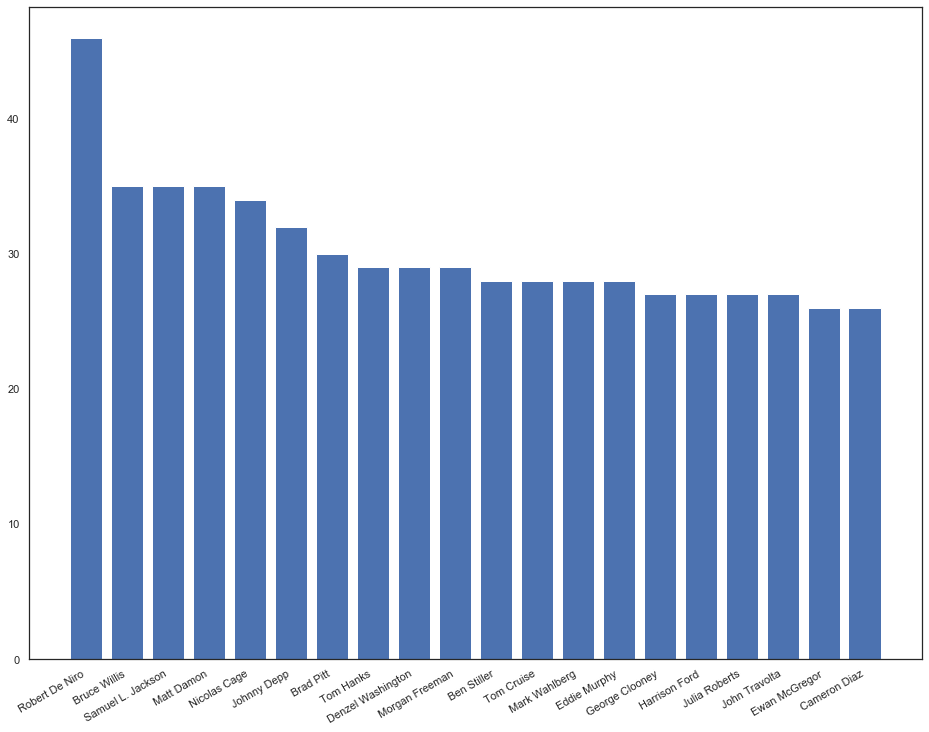

In [28]:
plt.figure(figsize=(16,12))
plt.bar(np.arange(20), tmdb_casts_count['count'].head(20))
plt.xticks(np.arange(20), tmdb_casts_count['cast'].head(20), rotation=30, ha='right')
plt.show()

### 1.4.2 Top 20 Actors with Most Appearance

In [29]:
tmdb_directors = tmdb.groupby('director').size().reset_index()
tmdb_directors = tmdb_directors.rename(columns={0:'count'})
tmdb_directors = tmdb_directors.sort_values(by=['count'], ascending=False)

tmdb_directors.head(20)

,director,count
2102,Steven Spielberg,27
2315,Woody Allen,21
377,Clint Eastwood,20
1427,Martin Scorsese,20
2045,Spike Lee,16
1847,Ridley Scott,16
1890,Robert Rodriguez,16
1806,Renny Harlin,15
2101,Steven Soderbergh,15
1650,Oliver Stone,14


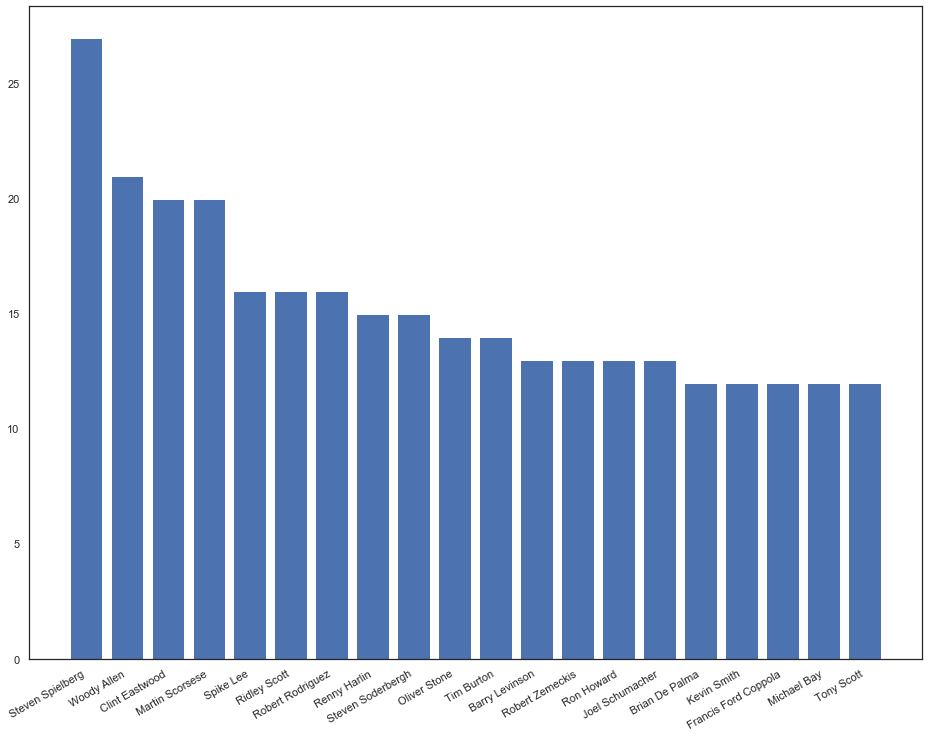

In [30]:
plt.figure(figsize=(16,12))
plt.bar(np.arange(20), tmdb_directors['count'].head(20))
plt.xticks(np.arange(20), tmdb_directors['director'].head(20), rotation=30, ha='right')
plt.show()

## 1.5 Keywords

In [31]:
tmdb_keywords = tmdb[['id', 'title', 'keyword_0', 'keyword_1', 'keyword_2', 'keyword_3', 'keyword_4']].copy()
tmdb_keywords = tmdb_keywords.set_index(['id', 'title']).stack().reset_index()[['id', 'title', 0]]
tmdb_keywords = tmdb_keywords.rename(columns={0:'keyword'})

tmdb_keywords.head(15)

,id,title,keyword
0,19995,Avatar,culture clash
1,19995,Avatar,future
2,19995,Avatar,space war
3,19995,Avatar,space colony
4,19995,Avatar,society
5,285,Pirates of the Caribbean: At World's End,ocean
6,285,Pirates of the Caribbean: At World's End,drug abuse
7,285,Pirates of the Caribbean: At World's End,exotic island
8,285,Pirates of the Caribbean: At World's End,east india trading company
9,285,Pirates of the Caribbean: At World's End,love of one's life


In [32]:
tmdb_keywords_count = tmdb_keywords.groupby('keyword').size().to_frame().reset_index()
tmdb_keywords_count = tmdb_keywords_count.rename(columns={0:'count'})
tmdb_keywords_count = tmdb_keywords_count.sort_values(by=['count'], ascending=False)

len(tmdb_keywords_count)

5133

5133 keywords are used to descirbe the movices

In [33]:
tmdb_keywords_count.head(20)

,keyword,count
2283,independent film,221
370,based on novel,193
5062,woman director,153
1392,duringcreditsstinger,112
4296,sport,108
4050,sex,108
1405,dystopia,95
3030,musical,90
3112,new york,89
470,biography,82


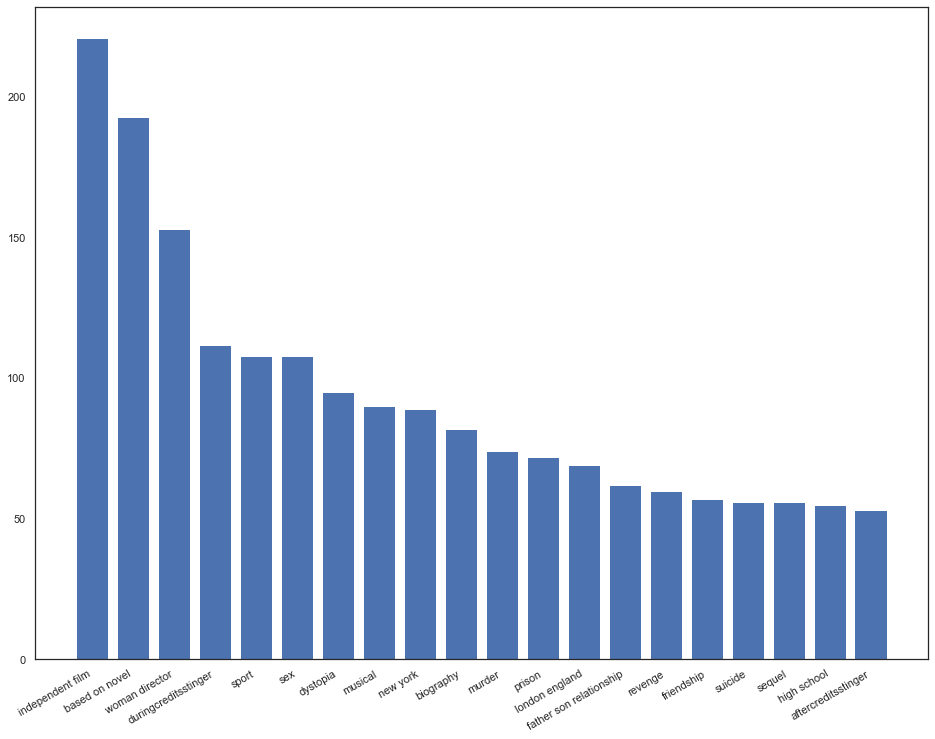

In [34]:
plt.figure(figsize=(16,12))
plt.bar(np.arange(20), tmdb_keywords_count['count'].head(20))
plt.xticks(np.arange(20), tmdb_keywords_count['keyword'].head(20), rotation=30, ha='right')
plt.show()

## 2 Movie Recommendation

IMDb does not use the plain movie vote average as the score to for instance compose its Top 250. Instead,it uses a formula that also takes the number of votes into account.

$$ W = \frac{R \times v + C\times m}{v+m}$$

Where:
- W = weighted rating
- R = average rating for the movie as a number from 1 to 10 (vote average)
- v = number of votes for the movie (vote count)
- m = minimum votes required to be listed (75% quantile)
- C = the mean vote across the whole report

In [35]:
tmdb['vote_average'].describe()

count    4790.000000
mean        6.095574
std         1.184000
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [36]:
weighted_rate_c=6.095574

The mean vote across the whole report, the parameter C, is 6.09 for this dataset.

In [37]:
tmdb['vote_count'].describe()

count     4790.000000
mean       692.068058
std       1235.748570
min          0.000000
25%         55.000000
50%        237.000000
75%        739.500000
max      13752.000000
Name: vote_count, dtype: float64

In [38]:
weighted_rate_m=739.5

The minimum votes required to be listed, the parameter m, is 740, the 75% quantile.

The above formula is used to calculate the weighted rating. What the formula does is that moives with very few votes, will get weigted ratings very close to the mean of all movies, and the moives with vote counts much higher than the minimum requirement, which is 740 here, will get weigted ratings close to their vote average. 

In [39]:
tmdb['weighted_rate'] = (tmdb['vote_average']*tmdb['vote_count']+weighted_rate_c*weighted_rate_m)/(tmdb['vote_count']+weighted_rate_m)

In [40]:
tmdb_weighted_rate = tmdb.sort_values(by=['weighted_rate'], ascending=False).copy()
tmdb_weighted_rate.head(20)[['id', 'title', 'vote_average', 'vote_count', 'weighted_rate']]

,id,title,vote_average,vote_count,weighted_rate
1881,278,The Shawshank Redemption,8.5,8205,8.301210
3335,238,The Godfather,8.4,5893,8.143065
662,550,Fight Club,8.3,9413,8.139431
3230,680,Pulp Fiction,8.3,8428,8.122179
65,155,The Dark Knight,8.2,12002,8.077862
809,13,Forrest Gump,8.2,7927,8.020432
96,27205,Inception,8.1,13752,7.997714
1818,424,Schindler's List,8.3,4329,7.978372
3863,244786,Whiplash,8.3,4254,7.973541
95,157336,Interstellar,8.1,10867,7.972289


Some Observations:
- Inception, the movie with the largest number of votes, was just outside the Top 20 of movies with the highest vote average and has moved up to 7th place based on the weighted rate
- Seven Samurai, with a vote count of only 878 and a vote average of 8.2, has dropped out of the Top 20

### 2.1 Simple Recommendations

Simple recommendations offer only generalized recommendations to every user, based on the movie popularity, genre and language. The basic idea behind this recommendation is that moives that are more popular and critically acclaimed will have a higer probability of being liked by the average audience

In [49]:
def simple_recommendation(genre, language):
    select_mask = ((tmdb['genre_0']==genre)|(tmdb['genre_1']==genre)|(tmdb['genre_2']==genre))&(tmdb['language']==language)
    return tmdb[select_mask].sort_values(by=['weighted_rate'], ascending=False).head(10)

In [55]:
simple_recommendation('Drama', 'es')[['id', 'title', 'popularity', 'release_date', 'country']]

,id,title,popularity,release_date,country
2465,1417,Pan's Labyrinth,90.809408,2006-05-27,ES
3837,25376,The Secret in Their Eyes,25.894065,2009-08-13,AR
4087,55,Amores perros,23.281616,2000-06-16,MX
3759,6537,The Orphanage,29.071955,2007-08-27,ES
3147,219,Volver,19.747809,2006-03-16,ES
3594,1391,Y Tu Mamá También,16.890285,2001-06-08,MX
3560,211954,Instructions Not Included,9.597290,2013-07-20,MX
1462,45958,Biutiful,13.930763,2010-10-20,MX
2724,1913,The Sea Inside,17.363739,2004-09-03,ES
4221,18079,Nine Queens,8.589355,2000-08-31,AR


In [79]:
simple_recommendation('Action', 'cn')[['id', 'title', 'popularity', 'release_date', 'country']]

,id,title,popularity,release_date,country
2184,9470,Kung Fu Hustle,13.658985,2004-02-10,CN
4076,12207,The Legend of Drunken Master,15.046612,1994-02-03,HK
3097,11770,Shaolin Soccer,17.547680,2001-07-12,CN
1357,365222,Ip Man 3,19.167377,2015-12-19,HK
3307,33542,Rumble in the Bronx,17.318839,1995-01-30,HK
1955,290864,Kung Fu Jungle,6.895866,2014-10-31,HK
3712,13807,Exiled,8.486390,2006-09-06,HK
3461,10622,Mr. Nice Guy,7.077505,1997-01-31,AU
2013,30596,Bodyguards and Assassins,7.876883,2009-12-18,CN
2309,244339,Out of Inferno,1.583918,2013-03-10,HK


## 2.2  Content-based Recommendations

In [107]:
def similarity_count(tmdb, movie):
    tmdb_similarity = tmdb.copy()
    tmdb_similarity['similarity'] = tmdb_similarity.apply(lambda x: np.sum(np.in1d(x.values, movie.values)), axis=1)
    
    return tmdb_similarity.sort_values(by=['similarity', 'weighted_rate'], ascending=False).head(10)

In [108]:
similarity_count(tmdb, tmdb[tmdb['title']=='Avatar'])[['id', 'title', 'popularity', 'release_date', 'country']]

,id,title,popularity,release_date,country
0,19995,Avatar,150.437577,2009-12-10,US
1652,14164,Dragonball Evolution,21.677732,2009-04-01,US
216,87827,Life of Pi,51.328145,2012-11-20,US
587,2756,The Abyss,24.961625,1989-08-09,US
243,1593,Night at the Museum,48.780039,2006-10-20,US
122,2080,X-Men Origins: Wolverine,5.954334,2009-04-28,US
4140,20406,Rockaway,0.361554,2007-07-07,US
2444,25763,Damnation Alley,2.215261,1977-09-10,US
121,18360,Night at the Museum: Battle of the Smithsonian,81.781591,2009-05-20,US
1721,62206,30 Minutes or Less,25.039383,2011-08-11,US
